In [3]:
# -*- coding: utf-8 -*-
"""
Created on Tue May 21 11:09:45 2024

@author: Tj - Christian
"""

import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
data = pd.read_csv('timebill_y19_y23.csv')
data['hours'] = pd.to_timedelta(data['hours'])

def horas_por_proyecto(data):
    horas_proyecto = data.groupby('job_id')['hours'].sum()
    return horas_proyecto

def horas_facturables_vs_no_facturables(data):
    facturables = data[data['isbillable'] == 1]['hours'].sum()
    no_facturables = data[data['isbillable'] == 0]['hours'].sum()
    return facturables, no_facturables

def rendimiento_empleados(data):
    horas_empleado = data.groupby('employee')['hours'].sum()
    return horas_empleado

def analisis_temporal(data):
    data['trandate'] = pd.to_datetime(data['trandate'])
    horas_por_mes = data.groupby(data['trandate'].dt.to_period('M'))['hours'].sum()
    return horas_por_mes

def categorias_tareas(data):
    horas_categoria = data.groupby('task')['hours'].sum()
    horas_actividad = data.groupby('activity_perf')['hours'].sum()
    return horas_categoria, horas_actividad



# Ejecutar análisis
facturables, no_facturables = horas_facturables_vs_no_facturables(data)
print("Horas facturables:", facturables)
print("Horas no facturables:", no_facturables)



Horas facturables: 335 days 08:21:00
Horas no facturables: 463 days 23:08:00


In [4]:
# Ejecutar análisis
horas_empleado = rendimiento_empleados(data)
print(horas_empleado) 

employee
316      0 days 00:30:00
663     10 days 15:08:00
22919   15 days 23:10:00
40728   14 days 05:15:00
51946   16 days 10:23:00
              ...       
63393   14 days 02:45:00
63398   15 days 08:30:00
63444    4 days 20:00:00
63449    2 days 20:15:00
63473    0 days 12:30:00
Name: hours, Length: 62, dtype: timedelta64[ns]


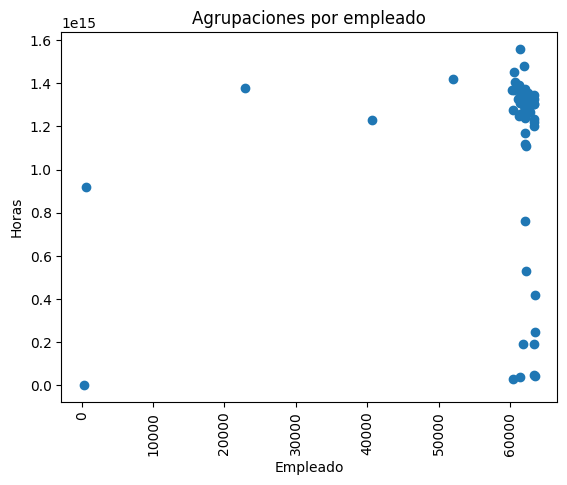

In [5]:
# Agrupaciones por empleado, trabajo, tarea y actividad
agrupaciones = ['employee', 'job_id', 'task', 'activity_perf']
resultados = {agrupacion: data.groupby(agrupacion)['hours'].sum() for agrupacion in agrupaciones if agrupacion in data.columns}

results_employee = resultados['employee']
empleados = results_employee.index
horas_trabajadas = results_employee.values
plt.scatter(empleados, horas_trabajadas)
plt.xlabel('Empleado')
plt.ylabel('Horas')
plt.title('Agrupaciones por empleado')
plt.xticks(rotation=90)
plt.show()

In [6]:
   # Gráfico 4: Agrupación de proyectos con más horas facturables por proyecto
proyectos = resultados['job_id']
proyectos_facturables = proyectos[data['isbillable'] == 1]
proyectos_facturables = proyectos_facturables.sum()
top_proyectos = proyectos_facturables.nlargest(10)
plt.bar(top_proyectos.index, top_proyectos.values)
plt.xlabel('Proyecto')
plt.ylabel('Horas facturables')
plt.title('Agrupación de proyectos con más horas facturables por proyecto')
plt.xticks(rotation=90)
plt.show()

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).